In [1]:
# Calculations carried out for the IT Support dashboard project

# Importing essential packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the initial dataset as a DataFrame:  df
df = pd.read_csv(
    "Dataset/aa_dataset-tickets-multi-lang-5-2-50-version.csv",
    encoding="utf-8",
    engine="python",
    on_bad_lines="skip",
)
df

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28582,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,We are addressing the performance issue with t...,Incident,Technical Support,high,en,400,Performance,IT,Tech Support,NaN,NaN,NaN,NaN,NaN
28583,Datensperrung in der Kundschaftsbetreuung,"Es gab einen Datensperrungsunfall, bei dem ung...",Ich kann Ihnen bei dem Datensperrungsunfall he...,Incident,Product Support,high,de,400,Security,IT,Tech Support,Bug,NaN,NaN,NaN,NaN
28584,Problem mit der Videokonferenz-Software heute,Wichtigere Sitzungen wurden unterbrochen durch...,"Sehr geehrte/r [Name], leider wurde das Proble...",Incident,Human Resources,low,de,400,Bug,Performance,Network,IT,Tech Support,NaN,NaN,NaN
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Received your request for updates on the integ...,Change,IT Support,high,en,400,Feature,IT,Tech Support,NaN,NaN,NaN,NaN,NaN


In [2]:
# Quality checking the dataset
# Information about the dataset
print("What is the length of the dataset?")
print(len(df))
print("")
print("Are there any missing values?")
print(df.isna().sum().sort_values())
print("")
print("What is the datatype of each column?")
print(df.dtypes)
print("")
print("How many bytes does each column use?")
print(df.memory_usage())
print("")
print("What are the initial stats of each column?")
print(df.describe())
print("")
print("What is the shape of my table?")
print(df.shape)

What is the length of the dataset?
28587

Are there any missing values?
body            0
type            0
queue           0
priority        0
language        0
version         0
tag_1           0
answer          7
tag_2          13
tag_3         136
tag_4        3058
subject      3838
tag_5       14042
tag_6       22713
tag_7       26547
tag_8       28022
dtype: int64

What is the datatype of each column?
subject     object
body        object
answer      object
type        object
queue       object
priority    object
language    object
version      int64
tag_1       object
tag_2       object
tag_3       object
tag_4       object
tag_5       object
tag_6       object
tag_7       object
tag_8       object
dtype: object

How many bytes does each column use?
Index          132
subject     228696
body        228696
answer      228696
type        228696
queue       228696
priority    228696
language    228696
version     228696
tag_1       228696
tag_2       228696
tag_3       228696
tag_4

In [3]:
# Loop to extract all unique values from each column in df
# The goal is to see what data each column holds without manually processing the full table
for column in df.columns:
    unique_values = df[column].sort_values(ascending=True).unique()
    length = len(unique_values)
    print(f"There were {length} unique values in {column}: {unique_values}")
    print("")

There were 24750 unique values in subject: [' Assistance Request'
 ' Bitte um Ausführliche Informationen zur Datenaufbereitungsdienstleistung'
 ' Datenschutzverletzung in Krankenhaus-Systemen ' ...
 'Übersicht der digitalen Kampagnen'
 'Überwachung medizinischer Daten in Krankenhaus-Systemen' nan]

There were 28587 unique values in body: [' Assistance Requested' ' Assistance Required' ' Assistance needed' ...
 'wishes to enhance data analysis tools for better optimization of decision-making processes for financial strategies to achieve better results.'
 'Änderungen in den Datenanalyseberichten wurden bemerkt. Obwohl die Berichte neu ausgeführt wurden, bestehen weiterhin Probleme mit den Dateneingaben. Neueste Software-Updates könnten der Grund sein.'
 'Überarbeitung der Datenanalyse, um Investitionen zu verbessern']

There were 28581 unique values in answer: [' Nehmen wir diesen Fall ernst. Bitte bereiten Sie zusätzliche Details des Vorfalls vor und rufen Sie uns unter <tel_num> an. Wi

In [4]:
# As the dataset contains a mix of German and English records, I'd like to see if I can focus my reporting on just the English records
# I'm doing this because I'd like to delve deeper into the QA-style responses later and I can only read and understand English
# Create English-only subset
df["language"] = df["language"].astype(str).str.lower().str.strip()
df_en = df[df["language"] == "en"].copy()
print("English-only rows:", len(df_en))
print("Absolute reduction:", len(df) - len(df_en), "rows")
print("Percent reduction: {:.2f}%".format(100 * (1 - len(df_en) / len(df))))

English-only rows: 16338
Absolute reduction: 12249 rows
Percent reduction: 42.85%


In [5]:
# Helper: produce comparison table for a categorical column
def compare_distribution(col, top_n=50):
    full_series = df[col].fillna("<<MISSING>>").astype(str).str.strip()
    en_series = df_en[col].fillna("<<MISSING>>").astype(str).str.strip()
    full_counts = full_series.value_counts(dropna=False)
    en_counts = en_series.value_counts(dropna=False)
    # combine categories present in either
    all_cats = sorted(
        set(full_counts.index).union(set(en_counts.index)),
        key=lambda x: (-full_counts.get(x, 0), str(x)),
    )
    rows = []
    for c in all_cats[:top_n]:
        fct = int(full_counts.get(c, 0))
        ect = int(en_counts.get(c, 0))
        f_pct = fct / full_counts.sum() if full_counts.sum() > 0 else 0
        e_pct = ect / en_counts.sum() if en_counts.sum() > 0 else 0
        abs_diff = e_pct - f_pct
        rel_diff = (abs_diff / f_pct) if f_pct != 0 else np.nan
        rows.append((c, fct, ect, f_pct, e_pct, abs_diff, rel_diff))
    result = pd.DataFrame(
        rows,
        columns=[
            col,
            "full_count",
            "en_count",
            "full_pct",
            "en_pct",
            "abs_pct_diff",
            "rel_pct_diff",
        ],
    )
    result = result.sort_values(by="full_count", ascending=False).reset_index(drop=True)
    return result


# Compute distributions and summary metrics
distributions = {}
summary = []
COMPARE_COLS = ["priority", "type", "queue"]

for col in COMPARE_COLS:
    if col not in df.columns:
        print(f"WARNING: column '{col}' not in dataset — skipping.")
        continue
    dist = compare_distribution(col, top_n=200)
    distributions[col] = dist
    # L1 metric (sum absolute proportion diffs)
    L1 = dist["abs_pct_diff"].abs().sum()
    idx_max = dist["abs_pct_diff"].abs().idxmax()
    max_cat = dist.loc[idx_max, col]
    max_abs = dist.loc[idx_max, "abs_pct_diff"]
    summary.append(
        {
            "column": col,
            "L1_total_abs_pct_diff": L1,
            "max_diff_category": max_cat,
            "max_abs_pct_diff": max_abs,
        }
    )
    # show the small table
    display(
        dist.style.format(
            {
                "full_count": "{:,}",
                "en_count": "{:,}",
                "full_pct": "{:.3%}",
                "en_pct": "{:.3%}",
                "abs_pct_diff": "{:.3%}",
                "rel_pct_diff": "{:.1%}",
            }
        )
    )

summary_df = pd.DataFrame(summary)
print("\nSummary of distribution shifts:")
display(
    summary_df.style.format(
        {"L1_total_abs_pct_diff": "{:.3%}", "max_abs_pct_diff": "{:.3%}"}
    )
)

,priority,full_count,en_count,full_pct,en_pct,abs_pct_diff,rel_pct_diff
0,medium,"11,515","6,618",40.281%,40.507%,0.226%,0.6%
1,high,"11,178","6,346",39.102%,38.842%,-0.260%,-0.7%
2,low,"5,894","3,374",20.618%,20.651%,0.033%,0.2%


,type,full_count,en_count,full_pct,en_pct,abs_pct_diff,rel_pct_diff
0,Incident,"11,466","6,571",40.109%,40.219%,0.110%,0.3%
1,Request,"8,187","4,665",28.639%,28.553%,-0.086%,-0.3%
2,Problem,"6,012","3,397",21.031%,20.792%,-0.239%,-1.1%
3,Change,"2,922","1,705",10.221%,10.436%,0.214%,2.1%


,queue,full_count,en_count,full_pct,en_pct,abs_pct_diff,rel_pct_diff
0,Technical Support,"8,362","4,737",29.251%,28.994%,-0.257%,-0.9%
1,Product Support,"5,252","3,073",18.372%,18.809%,0.437%,2.4%
2,Customer Service,"4,268","2,410",14.930%,14.751%,-0.179%,-1.2%
3,IT Support,"3,433","1,942",12.009%,11.886%,-0.123%,-1.0%
4,Billing and Payments,"2,788","1,595",9.753%,9.763%,0.010%,0.1%
5,Returns and Exchanges,"1,437",820,5.027%,5.019%,-0.008%,-0.2%
6,Service Outages and Maintenance,"1,148",664,4.016%,4.064%,0.048%,1.2%
7,Sales and Pre-Sales,918,513,3.211%,3.140%,-0.071%,-2.2%
8,Human Resources,576,348,2.015%,2.130%,0.115%,5.7%
9,General Inquiry,405,236,1.417%,1.444%,0.028%,2.0%



Summary of distribution shifts:


,column,L1_total_abs_pct_diff,max_diff_category,max_abs_pct_diff
0,priority,0.519%,high,-0.260%
1,type,0.649%,Problem,-0.239%
2,queue,1.276%,Product Support,0.437%


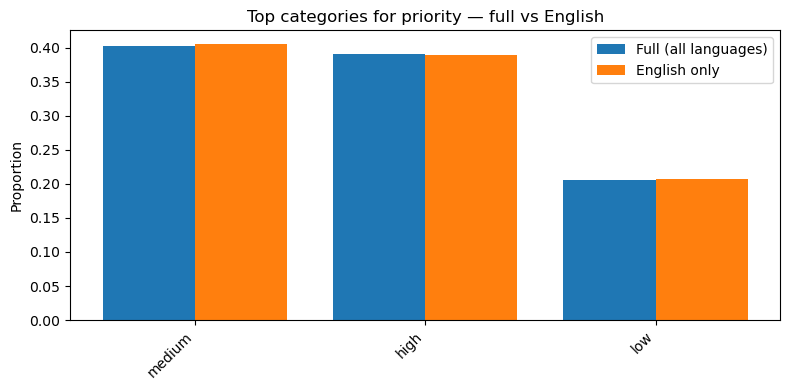

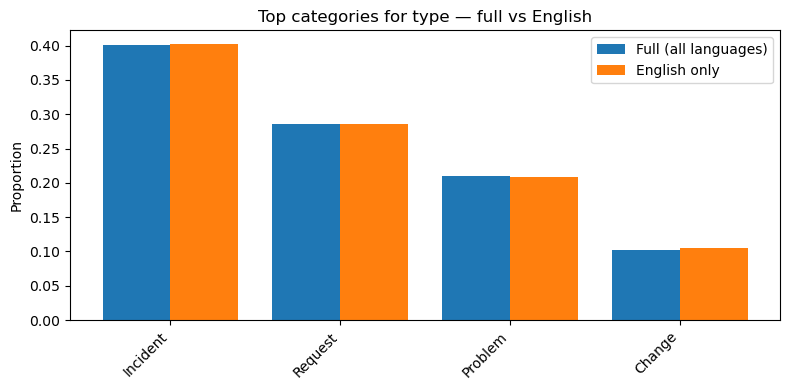

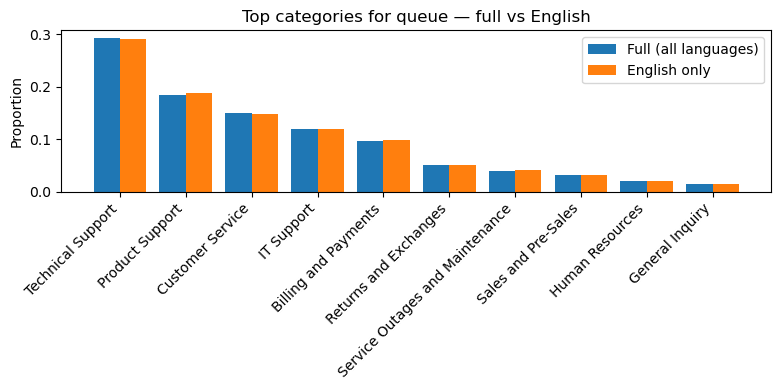

In [6]:
# Visual quick checks (bar charts of full vs en proportions) for each column
for col, tbl in distributions.items():
    fig, ax = plt.subplots(figsize=(8, 4))
    # use top 10 categories by full_count for readability
    plot_tbl = tbl.head(10).copy()
    x = np.arange(len(plot_tbl))
    ax.bar(x - 0.2, plot_tbl["full_pct"], width=0.4, label="Full (all languages)")
    ax.bar(x + 0.2, plot_tbl["en_pct"], width=0.4, label="English only")
    ax.set_xticks(x)
    ax.set_xticklabels(plot_tbl[col], rotation=45, ha="right")
    ax.set_ylabel("Proportion")
    ax.set_title(f"Top categories for {col} — full vs English")
    ax.legend()
    plt.tight_layout()
    plt.show()

In [7]:
# Statistical tests (chi-square + Cramer's V) if scipy is present
try:
    import scipy.stats as stats

    print("\nscipy available — computing chi-square and Cramer's V for each column.")

    def cramers_v(chi2, n, r, k):
        return np.sqrt(chi2 / (n * min(r - 1, k - 1)))

    tests = []
    for col, tbl in distributions.items():
        # contingency table: rows=categories, cols = counts [full, en]
        ct = tbl[["full_count", "en_count"]].astype(int).values
        chi2, p, dof, expected = stats.chi2_contingency(ct, correction=False)
        n = int(ct.sum())
        r, k = ct.shape
        v = cramers_v(chi2, n, r, k)
        tests.append(
            {
                "column": col,
                "chi2": chi2,
                "p_value": p,
                "dof": dof,
                "n": n,
                "cramers_v": v,
            }
        )
    tests_df = pd.DataFrame(tests)
    display(
        tests_df.style.format(
            {"chi2": "{:.3f}", "p_value": "{:.2e}", "cramers_v": "{:.3f}"}
        )
    )
    print("\nInterpretation guidance for Cramer's V (rule-of-thumb):")
    print(
        "  0.00-0.10: negligible, 0.10-0.20: weak, 0.20-0.40: moderate, >0.40: strong association"
    )
except Exception as e:
    print("\nscipy not available — statistical tests skipped.")
    print(
        "To run chi-square tests, install scipy (pip install scipy) and re-run this cell."
    )
    print(
        "You can still rely on L1 and the absolute differences to report how distributions shifted."
    )



scipy available — computing chi-square and Cramer's V for each column.


,column,chi2,p_value,dof,n,cramers_v
0,priority,0.317,8.53e-01,2,44925,0.003
1,type,0.804,8.48e-01,3,44925,0.004
2,queue,2.616,9.78e-01,9,44925,0.008



Interpretation guidance for Cramer's V (rule-of-thumb):
  0.00-0.10: negligible, 0.10-0.20: weak, 0.20-0.40: moderate, >0.40: strong association


All observed differences fall well below thresholds of practical concern (Cramér’s V < 0.1, total L1 < 1 %), confirming that subsequent analyses using English-only data are robust against language-sampling bias.

Working sample size: 3000
TF-IDF matrix shape: (3000, 5000)
Mean similarity: 0.073, Median: 0.049
Share of tickets with >=0.85 similarity to another: 5.43%

Cluster 0:
query regarding unexpected system downtime impa...
detected discrepancies in investment analytics ...
                      revise data analytics models
            integrating woocommerce data analytics
inquiry on data analytics solutions for investm...

Cluster 1:
             sluggish performance of saas platform
                  mongodb integration alternatives
request for guidance on integrating docusign an...
                      software compatibility issue
request for update on security operations compl...

Cluster 2:
inquiry about detailed specifications and integ...
enquiry on api integration capabilities for saa...
inquiry about data security features for scalab...
billing options for saas project management ser...
facing compatibility challenges with recently u...

Cluster 3:
             worries about digi

Processing type groups: 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]


Top 10 categories with highest recurrence:


,category_field,category_value,records,recurrence_rate
13,type,Request,3927,0.210339
11,type,Incident,5529,0.202387
9,queue,Technical Support,3969,0.155959
10,type,Change,1397,0.143880
0,queue,Billing and Payments,1347,0.141797
1,queue,Customer Service,2044,0.121820
5,queue,Product Support,2608,0.110813
4,queue,IT Support,1609,0.108142
12,type,Problem,2873,0.101636
7,queue,Sales and Pre-Sales,410,0.082927


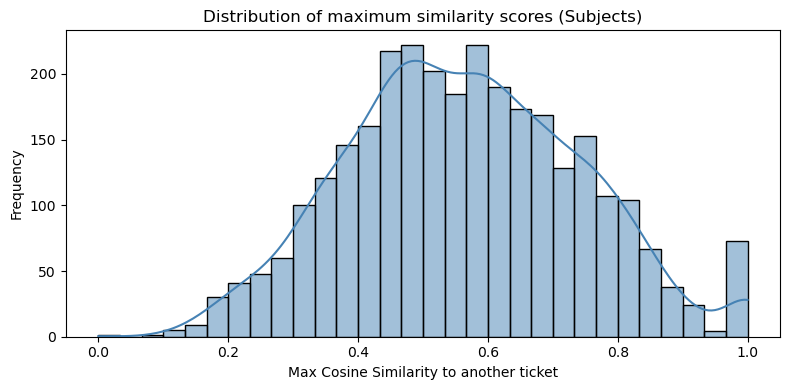

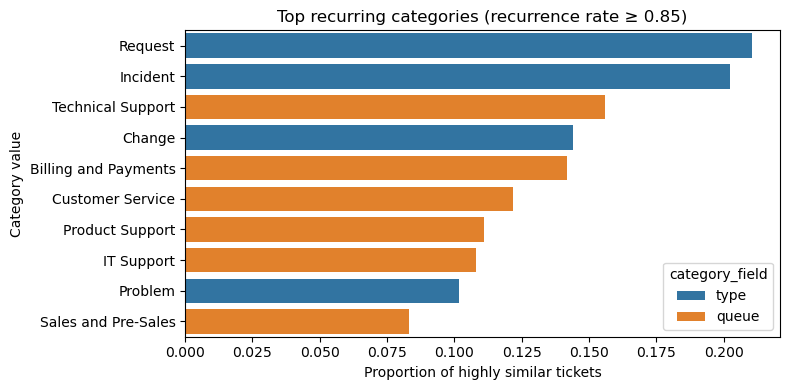

In [10]:
# ==========================================================
# THEMATIC RECURRENCE ANALYSIS ON TICKET SUBJECTS
# ==========================================================
# Objective:
# - Quantify how often different tickets describe the same issue
# - Identify recurring issue clusters using text similarity
# - Explore patterns both globally and within key categories
# ==========================================================

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import normalize
from tqdm import tqdm
import seaborn as sns

# ---------------------------
# 2. Prepare text data
# ---------------------------
# Clean the 'subject' field – lowercase, drop nulls, remove trivial ones
df_en["subject"] = df_en["subject"].fillna("").astype(str).str.lower().str.strip()
df_en2 = df_en[df_en["subject"].str.len() > 5].copy()  # remove very short subjects

# Optionally, limit sample for performance (you can raise limit if memory allows)
MAX_SAMPLES = 3000  # full set = 16,338 → heavy for cosine matrix (~2.6GB)
df_sample = df_en2.sample(n=MAX_SAMPLES, random_state=42)
print(f"Working sample size: {len(df_sample)}")

# ---------------------------
# 3. TF-IDF Vectorisation
# ---------------------------
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=5000,  # limit vocab size for performance
    ngram_range=(1, 2),  # include unigrams + bigrams (captures short phrases)
)
tfidf_matrix = vectorizer.fit_transform(df_sample["subject"])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# ---------------------------
# 4. Cosine Similarity Matrix
# ---------------------------
# Compute pairwise cosine similarity (matrix of NxN)
# Use sparse multiplication for memory efficiency
cosine_sim = cosine_similarity(tfidf_matrix, dense_output=False)

# Optional: summarise similarity distribution
nonzero_sim = cosine_sim[cosine_sim > 0].A1
print(
    f"Mean similarity: {nonzero_sim.mean():.3f}, Median: {np.median(nonzero_sim):.3f}"
)

# ---------------------------
# 5. Identify recurring issues (global view)
# ---------------------------
# For each ticket, find maximum similarity to another (excluding itself)
max_sim = []
for i in range(cosine_sim.shape[0]):
    row = cosine_sim[i].toarray().ravel()
    row[i] = 0  # ignore self-comparison
    max_sim.append(row.max())

df_sample["max_similarity"] = max_sim
recurrence_rate = (df_sample["max_similarity"] >= 0.85).mean()
print(f"Share of tickets with >=0.85 similarity to another: {recurrence_rate:.2%}")

# ---------------------------
# 6. Clustering (KMeans + Agglomerative)
# ---------------------------
# Normalize TF-IDF vectors for Euclidean-based clustering
tfidf_norm = normalize(tfidf_matrix)

# ---- KMeans ----
optimal_k = 10  # heuristic; adjust or tune later
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_sample["kmeans_cluster"] = kmeans.fit_predict(tfidf_norm)

# ---- Agglomerative (hierarchical) ----
agg = AgglomerativeClustering(n_clusters=optimal_k, metric="cosine", linkage="average")
df_sample["agg_cluster"] = agg.fit_predict(tfidf_norm.toarray())

# Inspect representative subjects per cluster (optional)
for c in range(optimal_k):
    print(f"\nCluster {c}:")
    print(
        df_sample[df_sample["kmeans_cluster"] == c]["subject"]
        .head(5)
        .to_string(index=False)
    )

# ---------------------------
# 7. Category-level recurrence (e.g. by 'queue' or 'type')
# ---------------------------
# Here we recompute within categories to see if similarity is higher internally
category_cols = ["queue", "type"]
results = []

for cat in category_cols:
    if cat not in df_en2.columns:
        print(f"Column '{cat}' missing, skipping.")
        continue
    cat_groups = df_en2.groupby(cat)
    for name, group in tqdm(cat_groups, desc=f"Processing {cat} groups"):
        group = group.dropna(subset=["subject"])
        if len(group) < 20:  # skip small groups
            continue
        # Vectorise within this group
        tfidf_sub = vectorizer.fit_transform(group["subject"])
        sim_sub = cosine_similarity(tfidf_sub, dense_output=False)
        max_sub = []
        for i in range(sim_sub.shape[0]):
            row = sim_sub[i].toarray().ravel()
            row[i] = 0
            max_sub.append(row.max())
        recurrence = (np.array(max_sub) >= 0.85).mean()
        results.append(
            {
                "category_field": cat,
                "category_value": name,
                "records": len(group),
                "recurrence_rate": recurrence,
            }
        )

cat_results = pd.DataFrame(results).sort_values(by="recurrence_rate", ascending=False)
print("\nTop 10 categories with highest recurrence:")
display(cat_results.head(10))

# ---------------------------
# 8. Visual summaries
# ---------------------------
plt.figure(figsize=(8, 4))
sns.histplot(df_sample["max_similarity"], bins=30, kde=True, color="steelblue")
plt.title("Distribution of maximum similarity scores (Subjects)")
plt.xlabel("Max Cosine Similarity to another ticket")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(
    data=cat_results.head(10),
    x="recurrence_rate",
    y="category_value",
    hue="category_field",
    dodge=False,
)
plt.title("Top recurring categories (recurrence rate ≥ 0.85)")
plt.xlabel("Proportion of highly similar tickets")
plt.ylabel("Category value")
plt.tight_layout()
plt.show()


### Stage 2: Thematic Clustering and Actionability Analysis

Building upon the previous recurrence findings, this section applies clustering and priority correlation to identify actionable issue themes. Clusters are automatically labelled via TF-IDF keywords, linked to ticket priorities, and ranked using an actionability score that combines recurrence, cohesion, and severity.

English-only records: 13,726
Working sample size: 3000

Cluster labels generated:
Cluster 0: analytics, data analytics, data, investment, analytics tools, tools
Cluster 1: problem, support, integration, investment, data, problems
Cluster 2: management, project management, project, saas, saas project, management saas
Cluster 3: digital, marketing, digital marketing, campaign, strategy, digital strategy
Cluster 4: security, breach, data, data security, data breach, healthcare
Cluster 5: medical, medical data, data, security, securing medical, securing
Cluster 6: concern, concern regarding, regarding, security, security concern, concern security
Cluster 7: billing, discrepancies, billing discrepancies, update billing, issue, update
Cluster 8: assistance, assistance required, required, assistance needed, needed, integration
Cluster 9: brand, strategies, growth, digital, digital strategies, brand growth

Top clusters by actionability score:


C:\Users\David\AppData\Local\Temp\ipykernel_3704\675570084.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sample.groupby(['kmeans_cluster', 'priority'])


,cluster_label,high_priority_ratio,cohesion,actionability_score
1,"problem, support, integration, investment, dat...",0.383206,0.217966,0.942972
4,"security, breach, data, data security, data br...",0.432540,0.055394,0.477898
0,"analytics, data analytics, data, investment, a...",0.429752,0.048172,0.452488
3,"digital, marketing, digital marketing, campaig...",0.406593,0.052252,0.446935
5,"medical, medical data, data, security, securin...",0.345528,0.054982,0.406077
8,"assistance, assistance required, required, ass...",0.400000,0.031646,0.376878
2,"management, project management, project, saas,...",0.366864,0.034450,0.360285
6,"concern, concern regarding, regarding, securit...",0.305085,0.024417,0.283412
7,"billing, discrepancies, billing discrepancies,...",0.312500,0.020426,0.277140
9,"brand, strategies, growth, digital, digital st...",0.292035,0.024193,0.273035


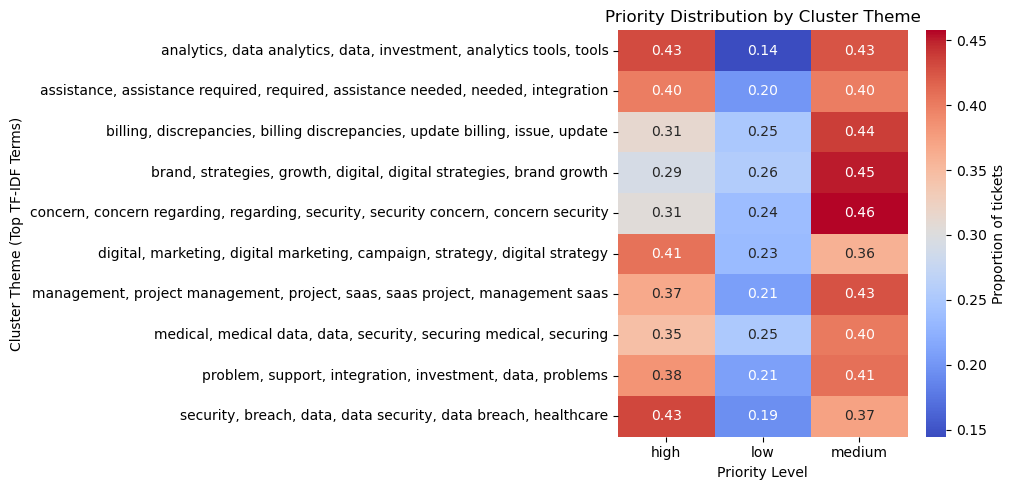

In [13]:
# Clean text (column name: lowercase 'subject')
df_en["subject"] = df_en["subject"].fillna("").astype(str).str.lower().str.strip()
df_en = df_en[df_en["subject"].str.len() > 5].copy()
print(f"English-only records: {len(df_en):,}")

# Optionally sample to limit computation
MAX_SAMPLES = 3000
df_sample = df_en.sample(n=MAX_SAMPLES, random_state=42)
print(f"Working sample size: {len(df_sample)}")

# ---------------------------
# 2. TF-IDF vectorization
# ---------------------------
vectorizer = TfidfVectorizer(
    stop_words="english", max_features=5000, ngram_range=(1, 2)
)
tfidf_matrix = vectorizer.fit_transform(df_sample["subject"])
tfidf_norm = normalize(tfidf_matrix)

# ---------------------------
# 3. Compute cosine similarity
# ---------------------------
cosine_sim = cosine_similarity(tfidf_matrix, dense_output=False)
df_sample["max_similarity"] = [
    cosine_sim[i]
    .toarray()
    .ravel()
    .take([j for j in range(cosine_sim.shape[0]) if j != i])
    .max()
    for i in range(cosine_sim.shape[0])
]

# ---------------------------
# 4. Clustering (KMeans + Agglomerative)
# ---------------------------
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_sample["kmeans_cluster"] = kmeans.fit_predict(tfidf_norm)

agg = AgglomerativeClustering(n_clusters=optimal_k, metric="cosine", linkage="average")
df_sample["agg_cluster"] = agg.fit_predict(tfidf_norm.toarray())

# ---------------------------
# 5. Cluster labelling via top TF-IDF terms
# ---------------------------
feature_names = np.array(vectorizer.get_feature_names_out())
cluster_labels = []

for c in range(optimal_k):
    cluster_indices = np.where(df_sample["kmeans_cluster"] == c)[0]
    if len(cluster_indices) == 0:
        cluster_labels.append("empty")
        continue
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
    top_indices = np.array(cluster_tfidf.A1).argsort()[-6:][::-1]
    top_terms = feature_names[top_indices]
    label = ", ".join(top_terms)
    cluster_labels.append(label)

cluster_label_map = {i: lbl for i, lbl in enumerate(cluster_labels)}
df_sample["cluster_label"] = df_sample["kmeans_cluster"].map(cluster_label_map)

print("\nCluster labels generated:")
for cid, lbl in cluster_label_map.items():
    print(f"Cluster {cid}: {lbl}")

# ---------------------------
# 6. Cluster metrics and cohesion
# ---------------------------
cluster_summary = (
    df_sample.groupby("kmeans_cluster")
    .agg(cluster_size=("subject", "count"), mean_similarity=("max_similarity", "mean"))
    .reset_index()
)
cluster_summary["label"] = cluster_summary["kmeans_cluster"].map(cluster_label_map)
cluster_summary["cohesion"] = cluster_summary["mean_similarity"] * (
    cluster_summary["cluster_size"] / len(df_sample)
)

# ---------------------------
# 7. Correlation with priority
# ---------------------------
priority_order = ["low", "medium", "high"]
df_sample["priority"] = (
    df_sample["priority"].astype(str).str.lower().replace({"nan": np.nan})
)
df_sample["priority"] = pd.Categorical(
    df_sample["priority"], categories=priority_order, ordered=True
)

priority_summary = (
    df_sample.groupby(["kmeans_cluster", "priority"])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)
)
priority_summary["cluster_label"] = priority_summary.index.map(cluster_label_map)

# Compute priority correlation index (proxy): % of high-priority tickets per cluster
priority_summary["high_priority_ratio"] = priority_summary["high"].fillna(0)
priority_summary = priority_summary.merge(
    cluster_summary[["kmeans_cluster", "cohesion"]], on="kmeans_cluster", how="left"
)

# ---------------------------
# 8. Actionability scoring
# ---------------------------
# Formula: Actionability = Recurrence_weight * High_priority_weight * Cohesion_weight
# Normalize each component 0–1 before combining
priority_summary["recurrence_weight"] = (
    priority_summary["cohesion"] / priority_summary["cohesion"].max()
)
priority_summary["priority_weight"] = (
    priority_summary["high_priority_ratio"]
    / priority_summary["high_priority_ratio"].max()
)
priority_summary["actionability_score"] = (
    0.5 * priority_summary["recurrence_weight"]
    + 0.3 * priority_summary["priority_weight"]
    + 0.2
    * (priority_summary["recurrence_weight"] * priority_summary["priority_weight"])
)
priority_summary = priority_summary.sort_values(
    by="actionability_score", ascending=False
)

print("\nTop clusters by actionability score:")
display(
    priority_summary[
        ["cluster_label", "high_priority_ratio", "cohesion", "actionability_score"]
    ].head(10)
)

# ---------------------------
# 9. Visual summaries
# ---------------------------

plt.figure(figsize=(10, 5))

# Melt to long format so 'priority' becomes a column
priority_long = (
    priority_summary.reset_index()
    .melt(
        id_vars=["cluster_label"],
        value_vars=["low", "medium", "high"],
        var_name="priority",
        value_name="priority_ratio",
    )
    .fillna(0)
)

# Now pivot for the heatmap
pivot_data = priority_long.pivot(
    index="cluster_label", columns="priority", values="priority_ratio"
).fillna(0)

sns.heatmap(
    pivot_data,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Proportion of tickets"},
)
plt.title("Priority Distribution by Cluster Theme")
plt.xlabel("Priority Level")
plt.ylabel("Cluster Theme (Top TF-IDF Terms)")
plt.tight_layout()
plt.show()

# Save outputs for later reporting
cluster_summary.to_csv("cluster_summary.csv", index=False)
priority_summary.to_csv("priority_summary.csv", index=False)